In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.svx001 import create_position, read_factors#, scale_factors

In [3]:
from lib.cux002 import StrategyEvaluate1

In [4]:
method = 'cicso0'
instruments = 'ims'
task_id = '200037'
period = 5
name = 'lgbm'

In [5]:
strategy_settings = {'commission': 0.000012, 'slippage': 0, 'size': 200}

In [6]:
predict_data = read_factors(method=method,
                                instruments=instruments,
                                task_id=task_id,
                                period=period,
                                name=name)
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict
0,2024-12-05 10:20:00,IM,-0.001860,-0.000025
5,2024-12-05 10:25:00,IM,-0.000206,-0.000011
10,2024-12-05 10:30:00,IM,0.003050,-0.000017
15,2024-12-05 10:35:00,IM,0.004669,-0.000008
20,2024-12-05 10:40:00,IM,0.000327,-0.000025


In [7]:
#scale_factors(predict_data, method='roll_zscore',win=240, factor_name='predict')
predict_data['transformed'] = predict_data['predict']

In [8]:
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict,transformed
0,2024-12-05 10:20:00,IM,-0.001860,-0.000025,-0.000025
5,2024-12-05 10:25:00,IM,-0.000206,-0.000011,-0.000011
10,2024-12-05 10:30:00,IM,0.003050,-0.000017,-0.000017
15,2024-12-05 10:35:00,IM,0.004669,-0.000008,-0.000008
20,2024-12-05 10:40:00,IM,0.000327,-0.000025,-0.000025


In [9]:
signal_method = 'adaptive_signal'
signal_params = {'roll_num':25, 'threshold':0.9}
strategy_method = None#'trailing_atr_strategy'
strategy_params = None#{'atr_period':14,'atr_multiplier':6, 'max_volume':1}
#signal_method = 'quantile_signal'
#signal_params = {'roll_num':20, 'threshold':0.7}

In [10]:
pos_data, total_data2 = create_position(predict_data=predict_data,
                    signal_method=signal_method,
                    signal_params=signal_params,
                    strategy_method=strategy_method,
                    strategy_params=strategy_params)

In [11]:
pos_data.head()

code,IM
trade_time,
2024-12-05 10:20:00,0
2024-12-05 10:25:00,0
2024-12-05 10:30:00,0
2024-12-05 10:35:00,0
2024-12-05 10:40:00,0


In [12]:
eval1 = StrategyEvaluate1(pos_data=pos_data, total_data=total_data2,
                  strategy_settings=strategy_settings,
                  strategy_name=signal_method,
                  ret_name='nxt1_ret_{0}h'.format(period),
)

In [13]:
eval1.run()

{'final_return': -0.03682846015250518,
 'annual_return': -0.09179512158611447,
 'sharpe_ratio': -1.1475505604284955,
 'calmar_ratio': -1.241430629139786,
 'p/l_ratio': 0.9336868506047771,
 'win_ratio': 0.12106135986733002,
 'turnover': 0.2504145936981758,
 'max_drawdown': -0.0781626255337164,
 'downside_risk': 0.05916710880701495,
 'annual_volatility': 0.08105756250836572}

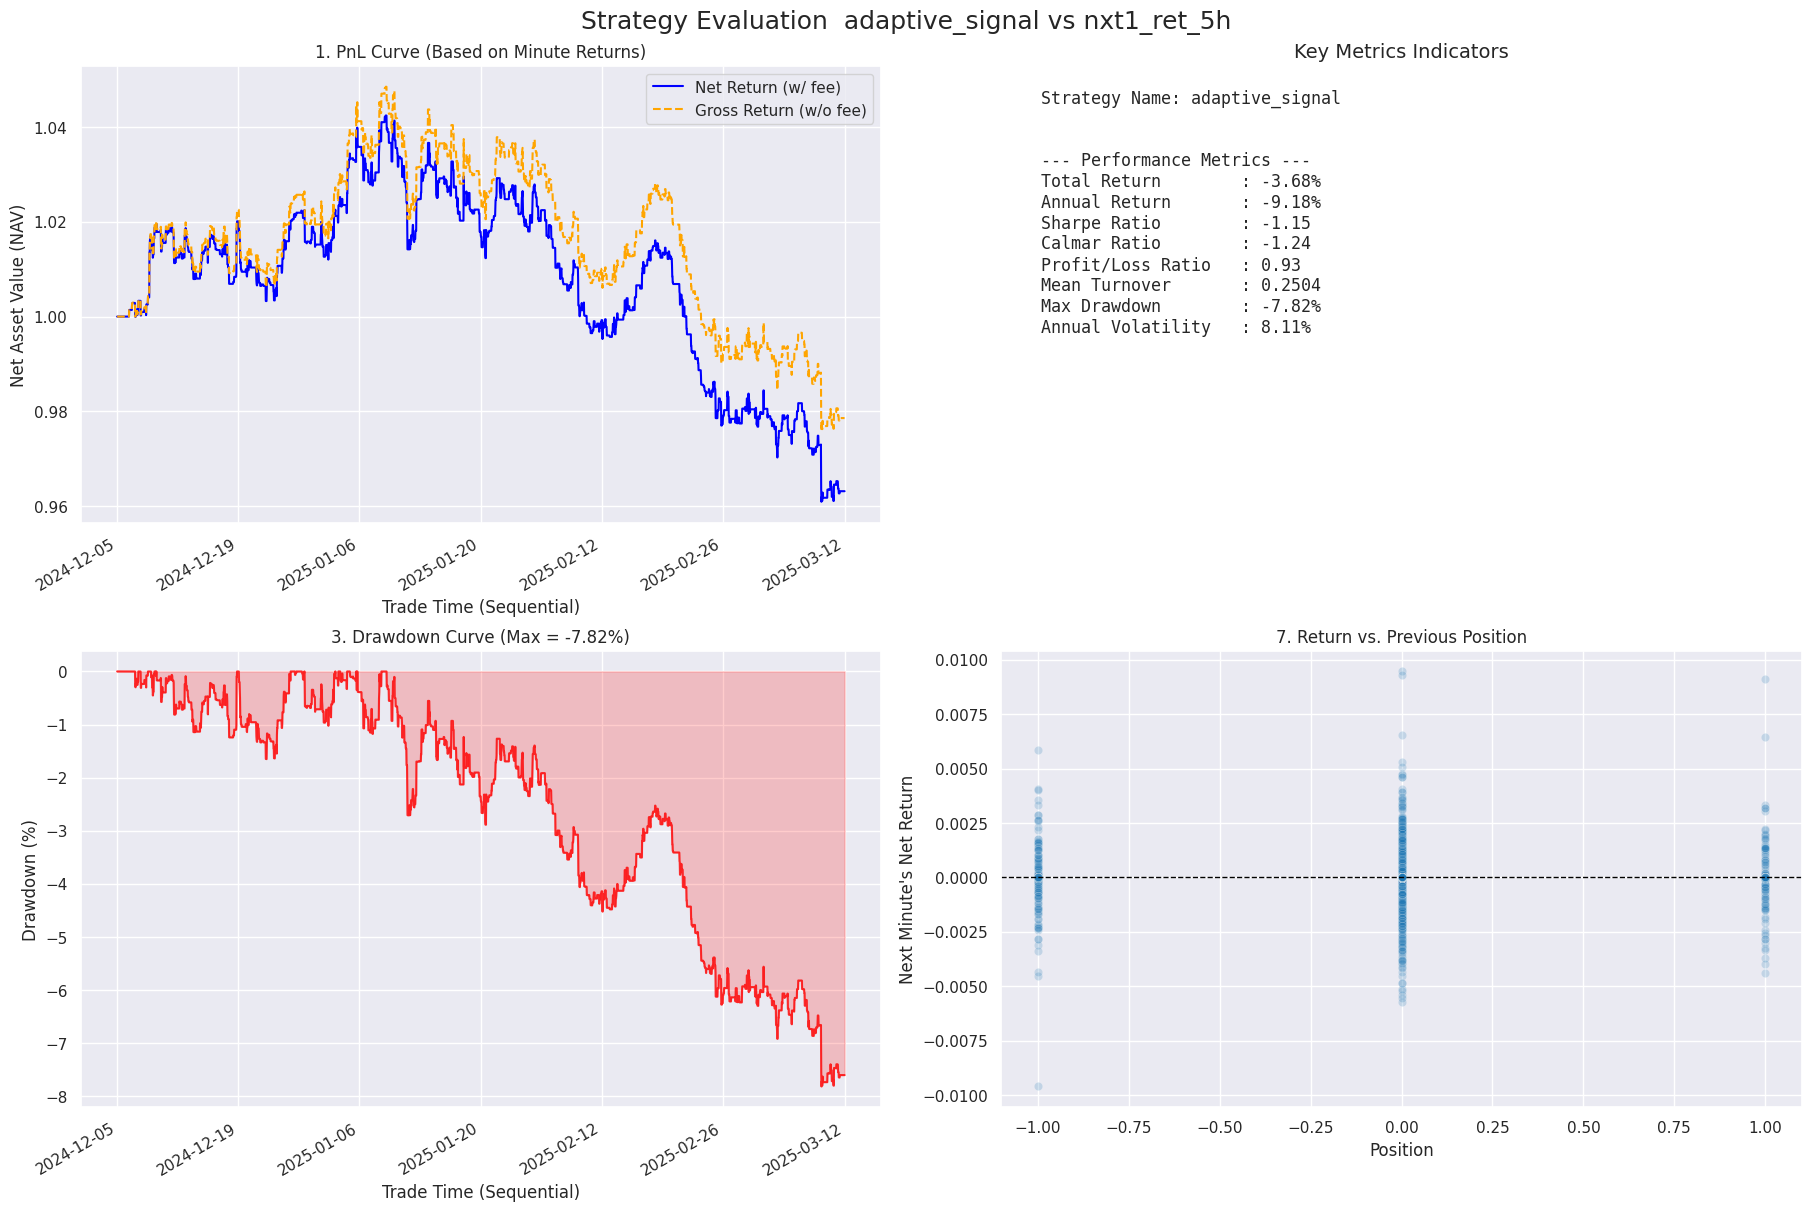

In [14]:
eval1.plot_results()